# Funciones de distribución de probabilidades

## Distribución uniforme

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
a=1
b=100
n=2000000
data = np.random.uniform(a,b,n)

(array([199927., 200338., 200512., 199549., 199892., 200173., 200076.,
        199933., 200106., 199494.]),
 array([ 1.00001088, 10.90000393, 20.79999699, 30.69999004, 40.5999831 ,
        50.49997615, 60.39996921, 70.29996226, 80.19995532, 90.09994837,
        99.99994142]),
 <a list of 10 Patch objects>)

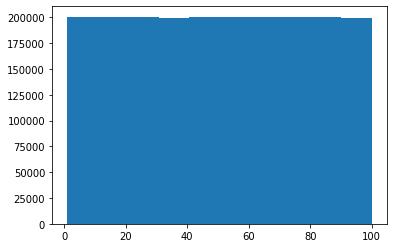

In [12]:
%matplotlib inline
plt.hist(data)

## Distribución Normal

In [20]:
data = np.random.randn(1000000)

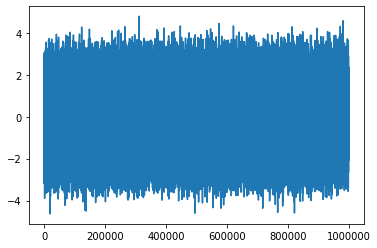

In [21]:
x = range(1,1000001)
plt.plot(x, data)

(array([1.12000e+02, 2.86800e+03, 3.26410e+04, 1.58188e+05, 3.36818e+05,
        3.15271e+05, 1.29256e+05, 2.30250e+04, 1.75800e+03, 6.30000e+01]),
 array([-4.63300867, -3.69115674, -2.74930482, -1.80745289, -0.86560097,
         0.07625096,  1.01810288,  1.95995481,  2.90180673,  3.84365866,
         4.78551058]),
 <a list of 10 Patch objects>)

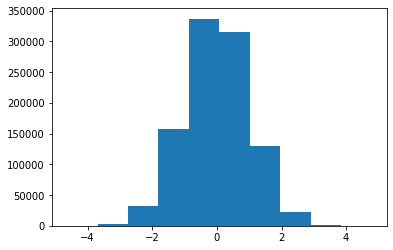

In [22]:
plt.hist(data)

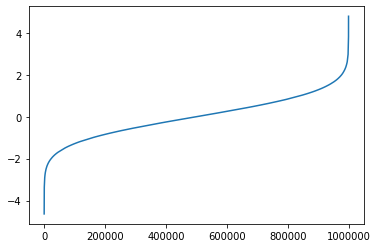

In [23]:
plt.plot(x,sorted(data))

(array([   8.,   63.,  380., 1359., 2580., 2830., 1839.,  741.,  172.,
          28.]),
 array([-4.3248936 , -2.44427278, -0.56365196,  1.31696886,  3.19758967,
         5.07821049,  6.95883131,  8.83945213, 10.72007295, 12.60069376,
        14.48131458]),
 <a list of 10 Patch objects>)

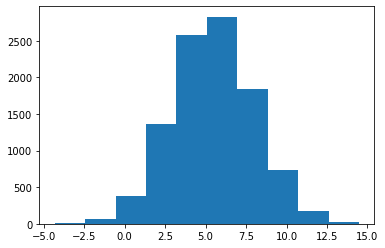

In [29]:
mu = 5.5
sd = 2.5
Z_10000 = np.random.randn(10000)
data = mu+sd*Z_10000 # Z = (X - mu) / sd
plt.hist(data)

In [30]:
data = np.random.randn(2,4)
data

array([[-0.996748  ,  0.73700374,  0.43763262, -0.29202639],
       [ 0.94278181,  0.50318017,  1.36857142, -0.55041243]])

## La simulación de Monte Carlo

* Generamos 2 números aleatorios uniformes x e y entre 0 y 1, en total 1000 veces
* Calculamos x^2 + y^2
    * Si el valor es inferior a 1 -> estamos dentro del círculo
    * Si el valor es superior a 1 -> estamos fuera del círculo
* Calculamos el número total de veces que están dentro del círculo y lo dividimos entre el número total de intentos para obtener una aproximación de la probabilidad de caer dentro del círculo.
* Usamos dicha probabilidad para aproximar el valor de pi.
* Repetimos el experimento un número de suficiente de veces (por ejemplo 1000), para obtener diferentes aproximaciones de π.
* Calculamos el promedio de los 1000 experimentos anteriores, para dar un valor final aproximado de π.

In [48]:
def pi_montecarlo(n, n_exp):

    pi_avg = 0
    pi_value_list = []
    for i in range(n_exp):
        value = 0
        x = np.random.uniform(0,1,n).tolist()
        y = np.random.uniform(0,1,n).tolist()
        for j in range(n):
            z = np.sqrt(x[j]**2+y[j]**2)
            if z<=1:
                value+=1
        float_value = float(value)
        pi_value = float_value* 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg/n_exp

    fig = plt.plot(pi_value_list)
    return (pi, fig)

(3.1415179999999996, [<matplotlib.lines.Line2D at 0x7f8a4b17afd0>])

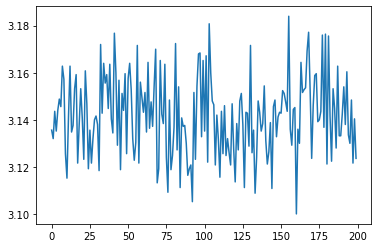

In [49]:
pi_montecarlo(10000,2000)